In [1]:
import shap # pip install --force-reinstall -v "shap==0.43.0"
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

/Users/ftag5848/anaconda3/envs/tab1/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='Species')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [3]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [5]:
# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
model.classes_

array([0, 1, 2])

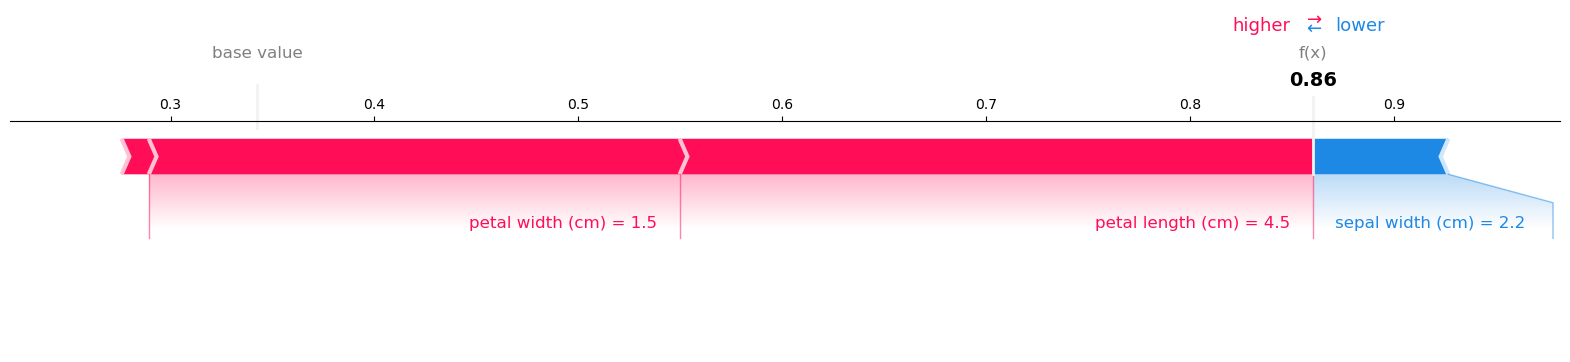

In [8]:
instance_index = 8  # Change this to the index of the instance you want to visualize

# Predict the class for the specified instance
predicted_class = model.predict(X_test.iloc[instance_index:instance_index +
                                            1])[0]

# Assuming shap_values has been correctly computed for the test set
# Generate the SHAP force plot for the predicted class of the specified instance
shap.force_plot(explainer.expected_value[predicted_class],
                shap_values[predicted_class][instance_index],
                X_test.iloc[instance_index].values,
                feature_names=iris.feature_names,
                matplotlib=True)

In [9]:
predicted_class

1

## How to interpret it:

__Base Value__: This is the average model output over the dataset that was used by the SHAP explainer during initialization (or the probability of the given class in the training data, as the above example). You can think of it as the starting point before considering the effect of each individual feature in the instance being explained.

__Output Value (f(x))__: This is the actual prediction for the instance being explained by the plot. It's the final output of the model after considering the contribution of each feature.

__Feature Values__: In the plot, you can see three features with numerical values next to them indicating the actual measured value for these features in the instance being explained .

__Red and Blue Arrows (SHAP Values)__: The length of these arrows indicates the magnitude of the impact of each feature on the model's prediction.

__Blue Arrows__: They represent features that are pushing the prediction to be lower than the base value. In this case, "sepal width (cm)" with a value of21.2 is pushing the prediction lower.
__Red Arrows__: These are features that push the prediction higher. Here, "petal width (cm)" with a value of 1.5 and Petal length (cm) with a value of 4.5 are pushing the prediction higher.

__Higher ⇨ Lower__: This shows the direction of the prediction. If the features are pushing the prediction to the right (red), it means they are contributing to a higher prediction value. Conversely, if they push to the left (blue), they contribute to a lower prediction value.

__Color Intensity__: The color intensity corresponds to the feature value's impact. A deeper color means a stronger impact on the model's output.

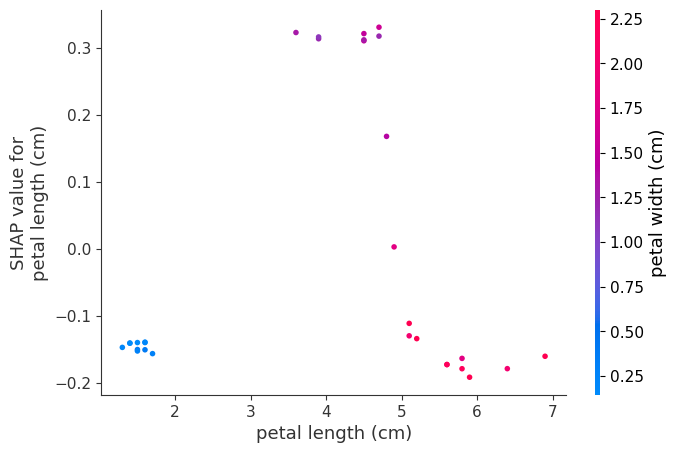

In [10]:
# Plot dependence plot for a specific feature
shap.dependence_plot("petal length (cm)",
                     shap_values[1],
                     X_test,
                     interaction_index="petal width (cm)")

## How to interpret it:

- The plot illustrates the relationship between `petal length (cm)` and its SHAP values.
- The x-axis corresponds to the actual values of `petal length (cm)` within the dataset.
- The y-axis indicates the SHAP values for the feature `petal length (cm)`, which quantify the impact of this feature on the model's prediction.
- The color scale on the right represents the `petal width (cm)`, suggesting that the SHAP values are also influenced by this second feature.

## Observations:

- There is a cluster of points with `petal length (cm)` below 2.5, which have negative SHAP values, indicating they reduce the predicted output.
- As the `petal length (cm)` increases, the SHAP values also tend to increase, showing a positive correlation with the model's prediction.
- The coloring of the points suggests that the `petal width (cm)` may interact with `petal length (cm)`, as different `petal width (cm)` values correspond to different SHAP values for similar `petal length (cm)` values.

## Conclusion:

- `Petal length (cm)` significantly influences the model's prediction, especially for larger values.
- There seems to be an interaction effect with `petal width (cm)` that further affects the SHAP value, as indicated by the varying colors across the plot's points.


# Energy example

In [1]:
import pandas as pd

# URL to the Appliances Energy Prediction Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"

# Load the dataset
df = pd.read_csv(url)

# Display the first few rows of the dataframe
print(df.head())


                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

"Appliances Energy Prediction" dataset from UCI Machine Learning Repository. Below is a brief data dictionary based on the dataset's features:

date: Time year-month-day hour:minute
Appliances: Energy use in Wh (Watt-hour)
lights: Energy use of light fixtures in the house in Wh
T1: Temperature in kitchen area, in Celsius
RH_1: Humidity in kitchen area, in %
T2: Temperature in living room area, in Celsius
RH_2: Humidity in living room area, in %
T3: Temperature in laundry room area
RH_3: Humidity in laundry room area, in %
T4: Temperature in office room, in Celsius
RH_4: Humidity in office room, in %
T5: Temperature in bathroom, in Celsius
RH_5: Humidity in bathroom, in %
T6: Temperature outside the building (north side), in Celsius
RH_6: Humidity outside the building (north side), in %
T7: Temperature in ironing room, in Celsius
RH_7: Humidity in ironing room, in %
T8: Temperature in teenager room 2, in Celsius
RH_8: Humidity in teenager room 2, in %
T9: Temperature in parents room, in Celsius
RH_9: Humidity in parents room, in %
T_out: Temperature outside (from Chievres weather station), in Celsius
Press_mm_hg: Pressure (from Chievres weather station), in mm Hg
RH_out: Humidity outside (from Chievres weather station), in %
Windspeed: Wind speed (from Chievres weather station), in m/s
Visibility: Visibility (from Chievres weather station), in km
Tdewpoint: Dew point temperature (from Chievres weather station), in Celsius
rv1, rv2: Random variables for noise


In [8]:
# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Display data types
print(df.dtypes)

         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576    

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'Appliances' is the target variable
X = df.drop('Appliances', axis=1)
y = df['Appliances']

# Convert any time stamps and categorical data to numeric if necessary
# For simplicity, let's drop non-numeric columns here
X = X.select_dtypes(include=['float64', 'int64'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 4678.1484646567005


In [3]:
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 68.39699163454999


/Users/ftag5848/anaconda3/envs/tab1/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


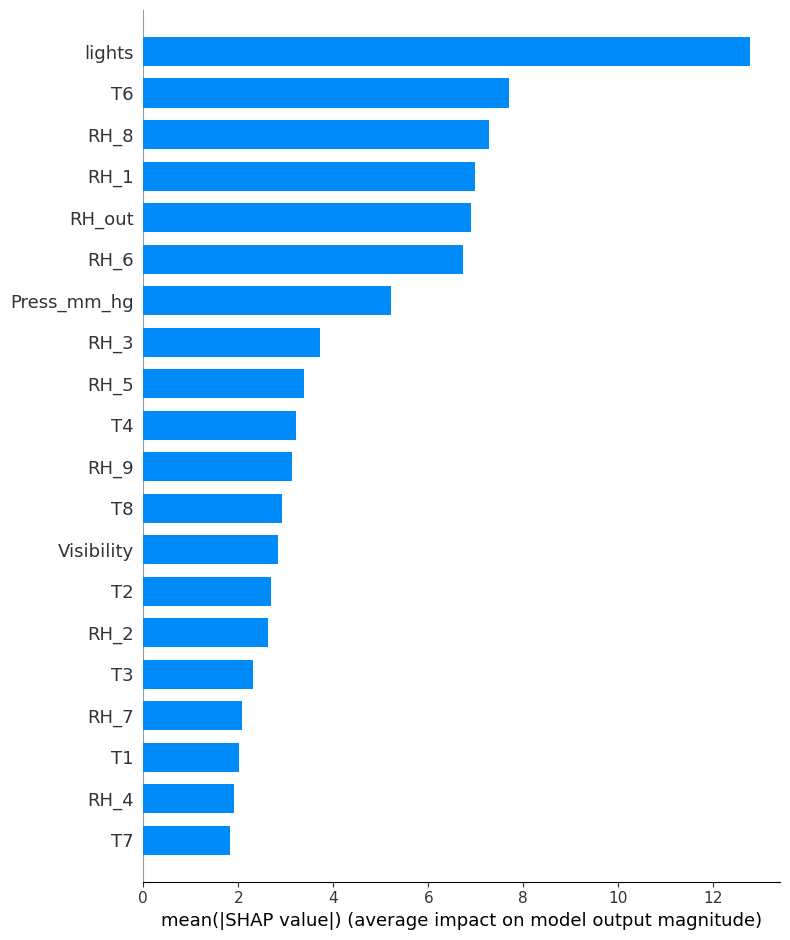

In [5]:
# Sample the training data to reduce size
sampled_X_train = X_train.sample(frac=0.1, random_state=42)  # Adjust frac as needed
sampled_y_train = y_train[sampled_X_train.index]

# Re-train model on the sampled data for faster execution (optional)
model.fit(sampled_X_train, sampled_y_train)

import shap
# Initialize the SHAP Explainer on the sampled data
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(sampled_X_train)


shap.summary_plot(shap_values, sampled_X_train, plot_type="bar")

 98%|===================| 1552/1579 [00:40<00:00]        No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


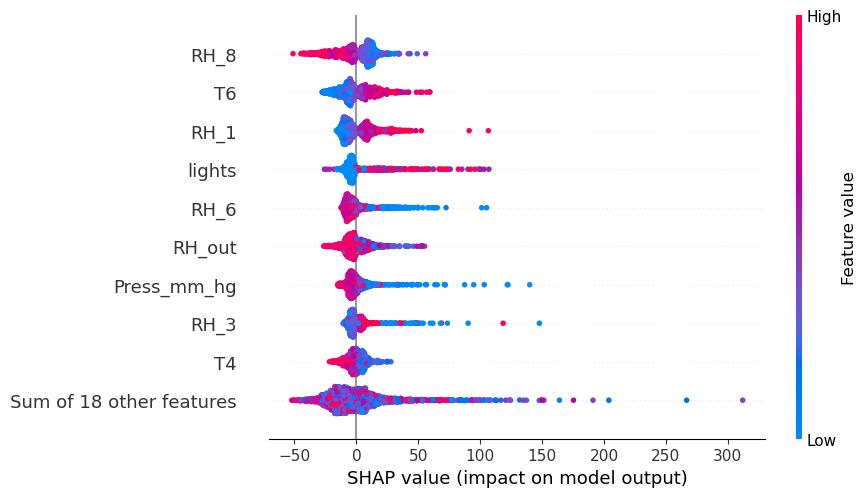

In [7]:
# Initialize the SHAP Explainer
explainer = shap.Explainer(model, sampled_X_train)

# Calculate SHAP values (this might take some time depending on your dataset size and model complexity)
shap_values = explainer(sampled_X_train, check_additivity=False)

# Generate the beeswarm plot
shap.plots.beeswarm(shap_values)

RH_8 (Relative Humidity in room 8): This feature shows a significant number of blue dots indicating a negative impact on the model's output, suggesting that higher humidity in this room tends to decrease the model's predicted energy consumption.

T6 (Temperature outside the building, north side): This feature predominantly has pink/red dots, indicating that higher temperatures outside have a positive impact, increasing the predicted energy consumption.

RH_1 (Relative Humidity in kitchen area): Similar to RH_8, but with a mix of effects, though it leans towards increasing the prediction values, showing more variability in its impact.

lights (Light energy consumption in Wh): Displays high variability with many dots above zero, suggesting that increased light energy consumption correlates with increased overall energy consumption predicted by the model.

Less Influential Features:

RH_out (Relative Humidity outside): Shows a tight cluster of blue and pink dots around zero, indicating a minimal impact on the model's output.
Press_mm_hg (Pressure in mm Hg): Also clustered near zero but spreads slightly wider, indicating a variable but generally low impact on model predictions.
